# HR Analytics: Data Exploration

Notebook này thực hiện Exploratory Data Analysis (EDA) cho dataset HR Analytics.

## Mục tiêu:
1. Load và khám phá cấu trúc dữ liệu
2. Phân tích phân phối các features
3. Kiểm tra missing values và outliers
4. Phân tích mối quan hệ giữa features và target
5. Trả lời các câu hỏi nghiên cứu

In [1]:
# Cell 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../src')

from data_processing import DataProcessor
from visualization import DataVisualizer

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully")


Libraries imported successfully


In [2]:
# Cell 2: Load data
processor = DataProcessor()
visualizer = DataVisualizer()

data, headers = processor.load_csv('../data/raw/aug_train.csv')
print(f"Dataset shape: {data.shape}")
print(f"Features: {headers}")

Dataset shape: (19158, 14)
Features: ['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


In [3]:
# Cell 3: Basic statistics
print("\n=== BASIC STATISTICS ===\n")
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")
print(f"\nFeature names:")
for i, header in enumerate(headers):
    print(f"  {i+1}. {header}")


=== BASIC STATISTICS ===

Number of samples: 19158
Number of features: 14

Feature names:
  1. enrollee_id
  2. city
  3. city_development_index
  4. gender
  5. relevent_experience
  6. enrolled_university
  7. education_level
  8. major_discipline
  9. experience
  10. company_size
  11. company_type
  12. last_new_job
  13. training_hours
  14. target



=== TARGET DISTRIBUTION ===

Không thay đổi: 14381 (75.07%)
Thay đổi công việc: 4777 (24.93%)


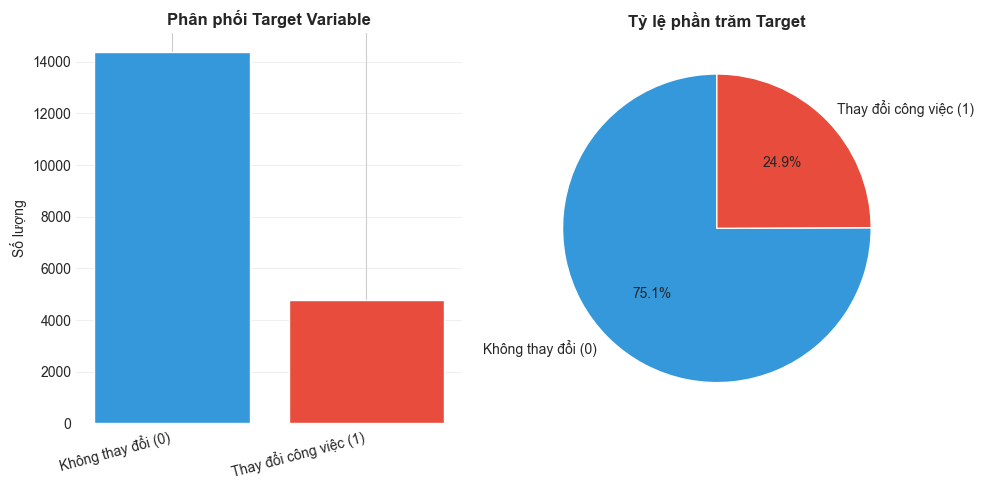

In [4]:
# Cell 4: Target distribution
target = processor.get_column_by_name(data, headers, 'target').astype(float)

print("\n=== TARGET DISTRIBUTION ===\n")
unique, counts = np.unique(target, return_counts=True)
for val, count in zip(unique, counts):
    label = "Không thay đổi" if val == 0 else "Thay đổi công việc"
    print(f"{label}: {count} ({count/len(target)*100:.2f}%)")

# Visualize
fig = visualizer.plot_target_distribution(target)
plt.show()


=== MISSING VALUES ANALYSIS ===

gender: 4508 (23.53%)
enrolled_university: 386 (2.01%)
education_level: 460 (2.40%)
major_discipline: 2813 (14.68%)
experience: 65 (0.34%)
company_size: 5938 (30.99%)
company_type: 6140 (32.05%)
last_new_job: 423 (2.21%)


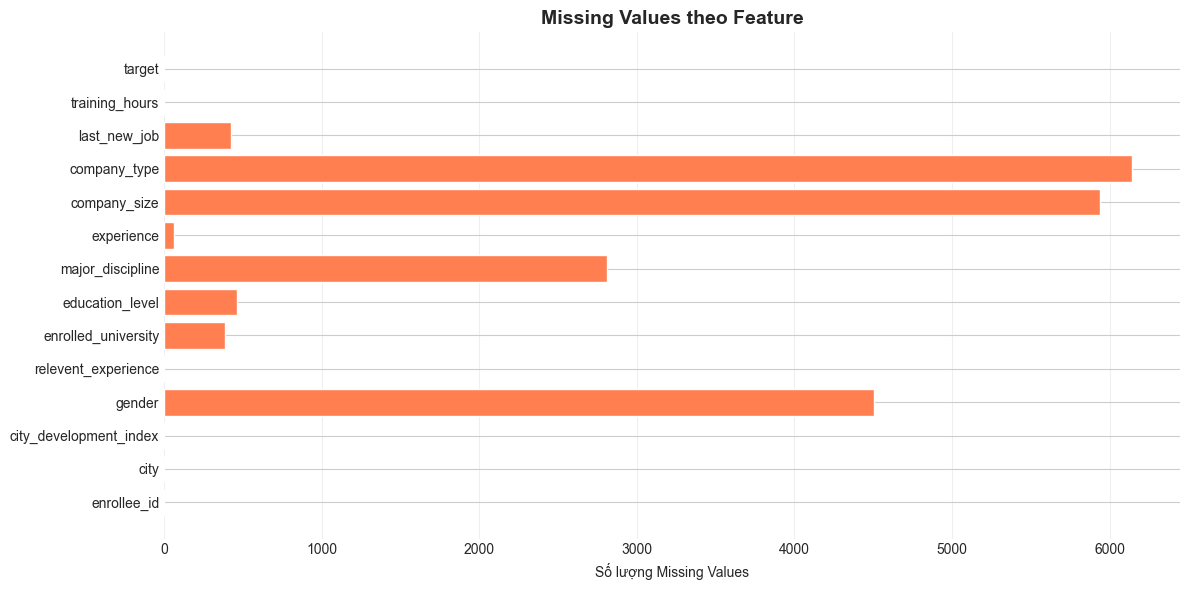

In [5]:
# Cell 5: Missing values analysis
print("\n=== MISSING VALUES ANALYSIS ===\n")
missing_mask, missing_count = processor.check_missing_values(data)

for i, (header, count) in enumerate(zip(headers, missing_count)):
    if count > 0:
        percentage = count / data.shape[0] * 100
        print(f"{header}: {count} ({percentage:.2f}%)")

# Visualize
fig = visualizer.plot_missing_values(missing_count, headers)
plt.show()


=== CITY_DEVELOPMENT_INDEX ===
mean: 0.8288
median: 0.9030
std: 0.1234
min: 0.4480
max: 0.9490
q25: 0.7400
q75: 0.9200


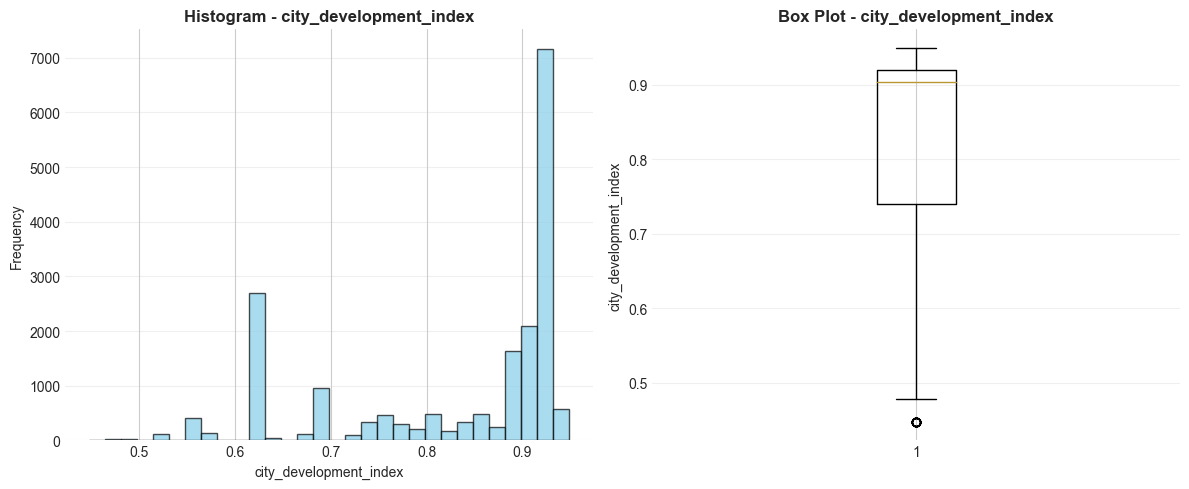

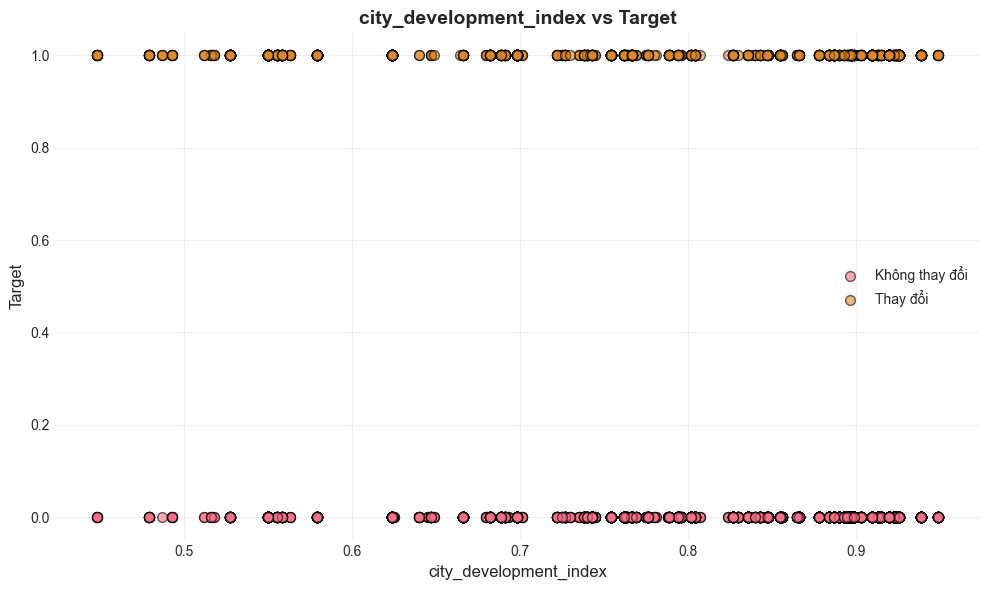


=== TRAINING_HOURS ===
mean: 65.3669
median: 47.0000
std: 60.0569
min: 1.0000
max: 336.0000
q25: 23.0000
q75: 88.0000


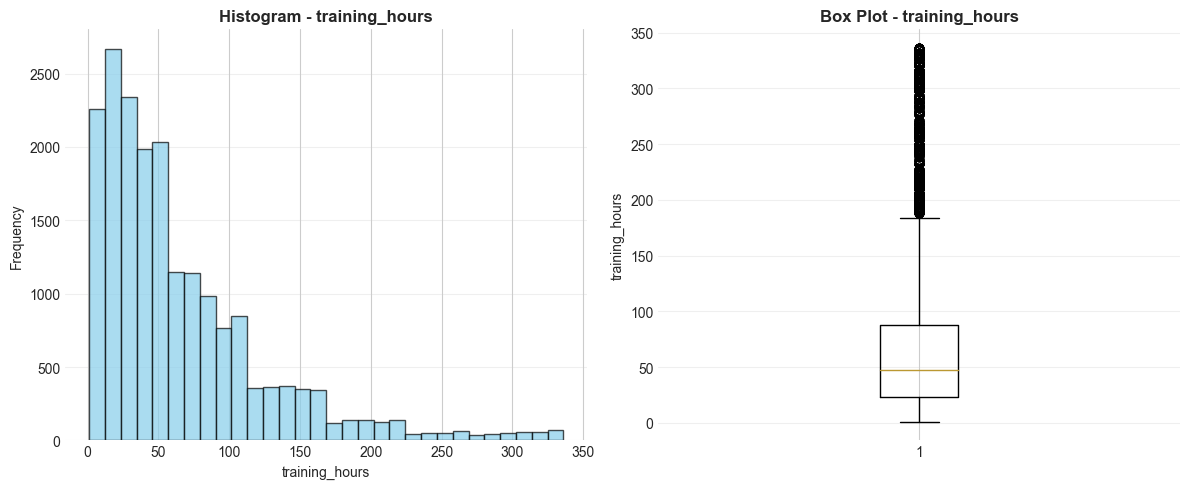

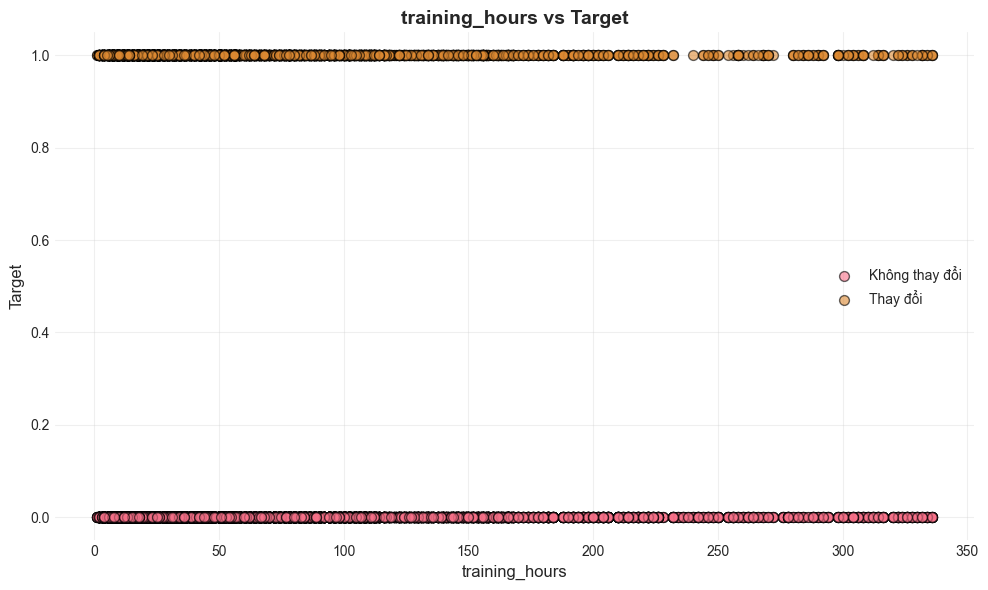

In [6]:
# Cell 6: Numerical features analysis
numerical_features = ['city_development_index', 'training_hours']

for feat in numerical_features:
    col = processor.get_column_by_name(data, headers, feat)
    col_numeric = processor.fill_missing_numerical(col, strategy='median')
    
    print(f"\n=== {feat.upper()} ===")
    stats = processor.get_statistics(col_numeric)
    for key, value in stats.items():
        print(f"{key}: {value:.4f}")
    
    # Visualize
    fig = visualizer.plot_numerical_distribution(col_numeric, feat)
    plt.show()
    
    # Scatter with target
    fig = visualizer.plot_scatter(
        col_numeric, target, 
        feat, 'Target',
        hue=target
    )
    plt.show()


=== GENDER ===
Unique values: 3
Top 5 values:
  Male: 17729
  Female: 1238
  Other: 191


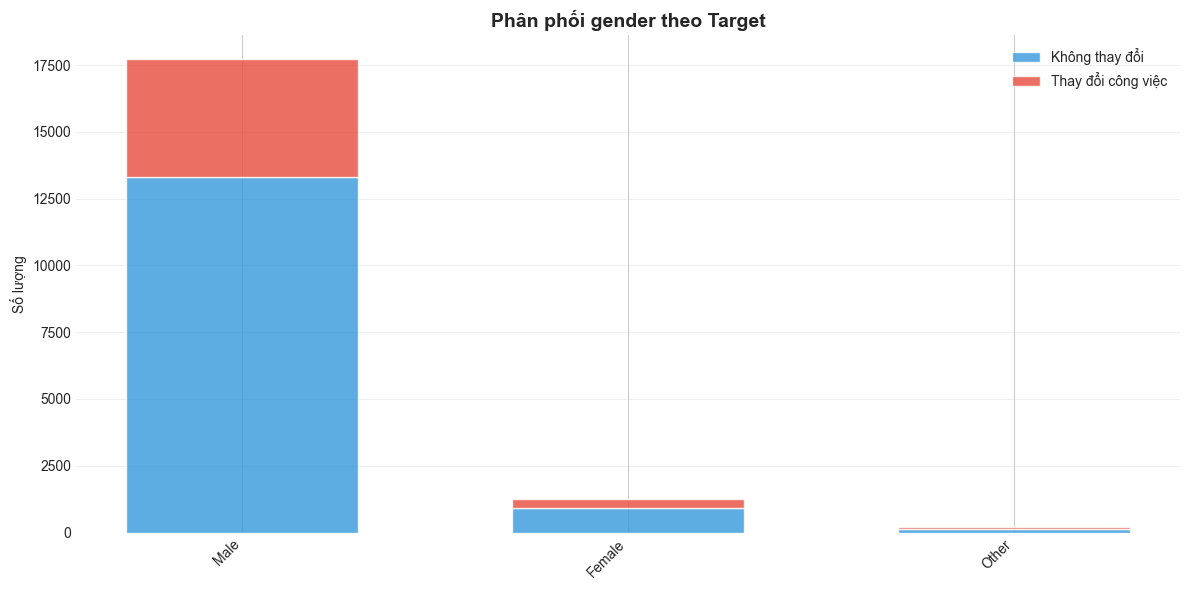


=== ENROLLED_UNIVERSITY ===
Unique values: 3
Top 5 values:
  no_enrollment: 14203
  Full time course: 3757
  Part time course: 1198


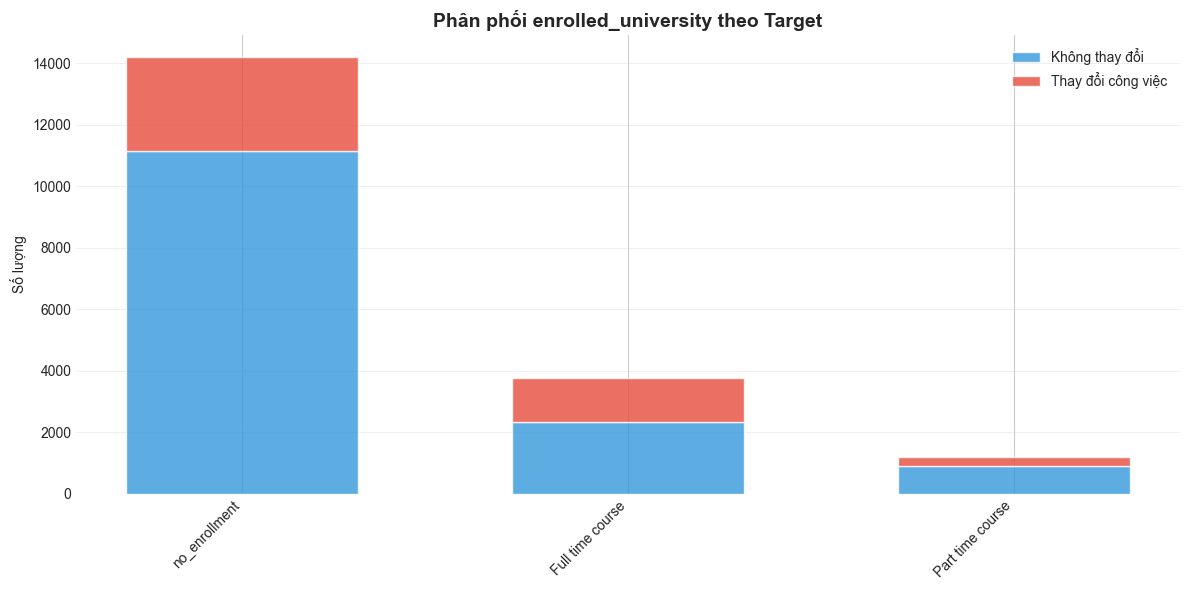


=== EDUCATION_LEVEL ===
Unique values: 5
Top 5 values:
  Graduate: 12058
  Masters: 4361
  High School: 2017
  Phd: 414
  Primary School: 308


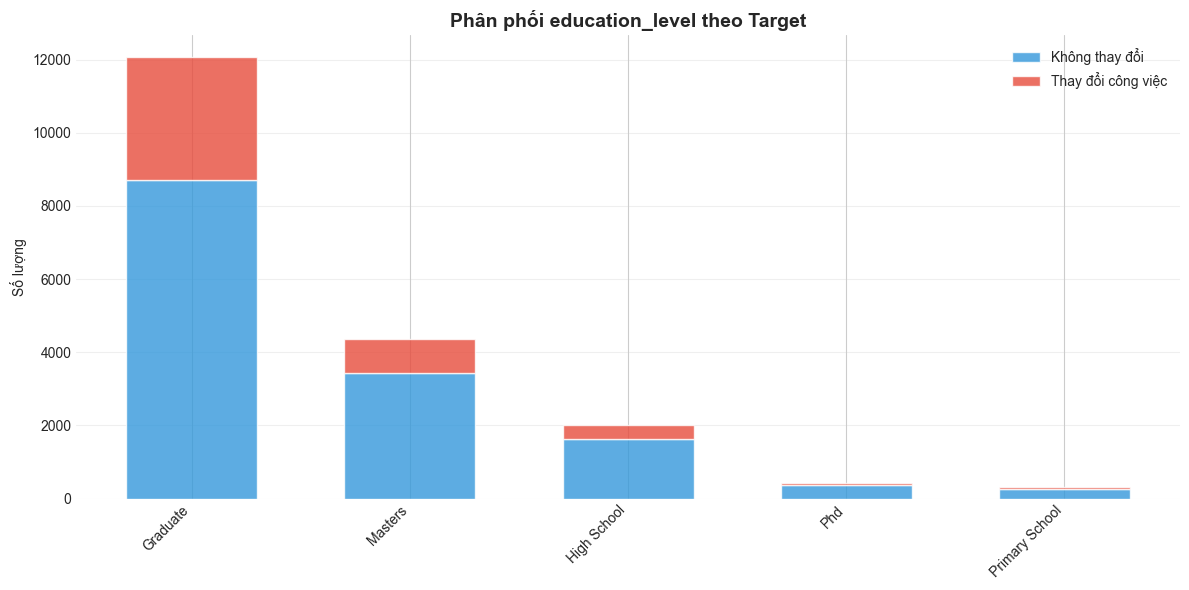


=== MAJOR_DISCIPLINE ===
Unique values: 6
Top 5 values:
  STEM: 17305
  Humanities: 669
  Other: 381
  Business Degree: 327
  Arts: 253


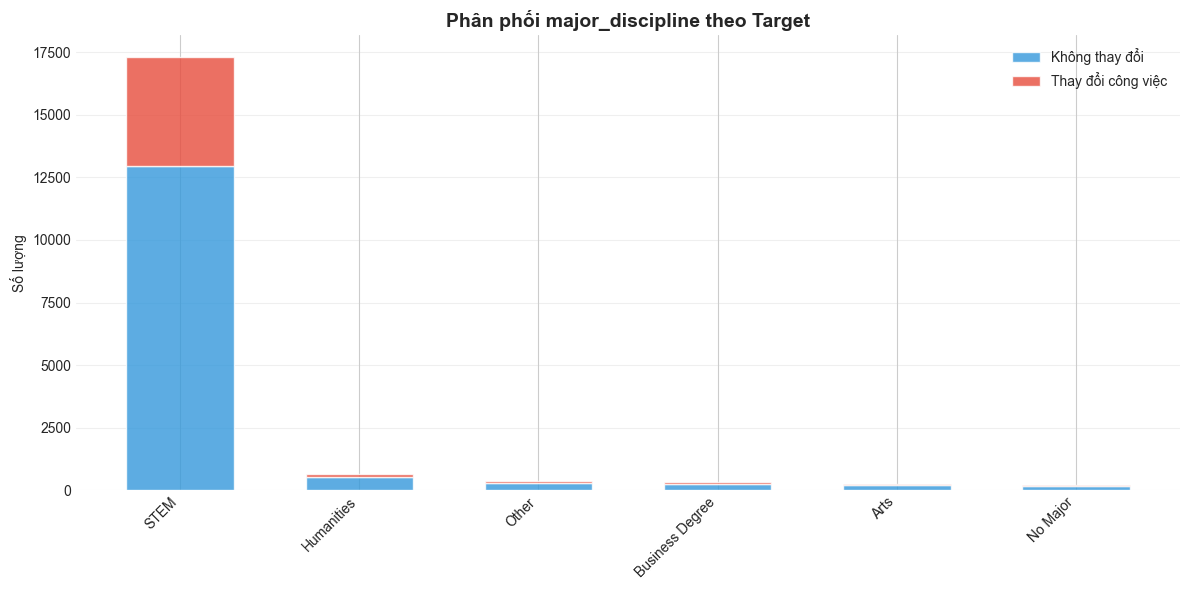


=== EXPERIENCE ===
Unique values: 22
Top 5 values:
  >20: 3351
  5: 1430
  4: 1403
  3: 1354
  6: 1216


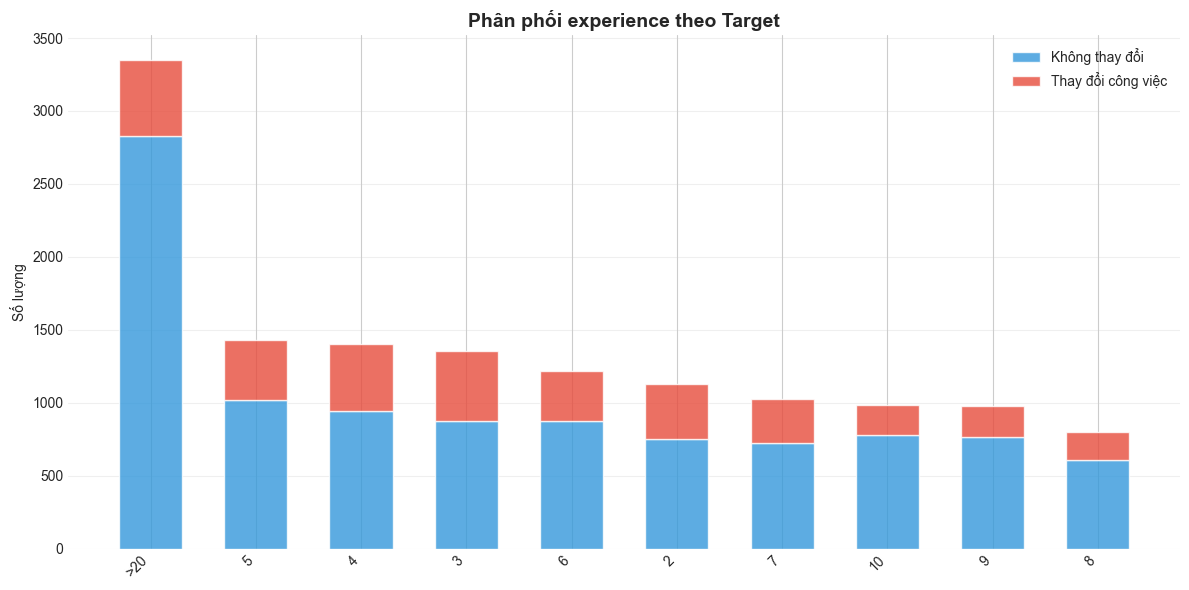


=== COMPANY_SIZE ===
Unique values: 8
Top 5 values:
  50-99: 9021
  100-500: 2571
  10000+: 2019
  10/49: 1471
  1000-4999: 1328


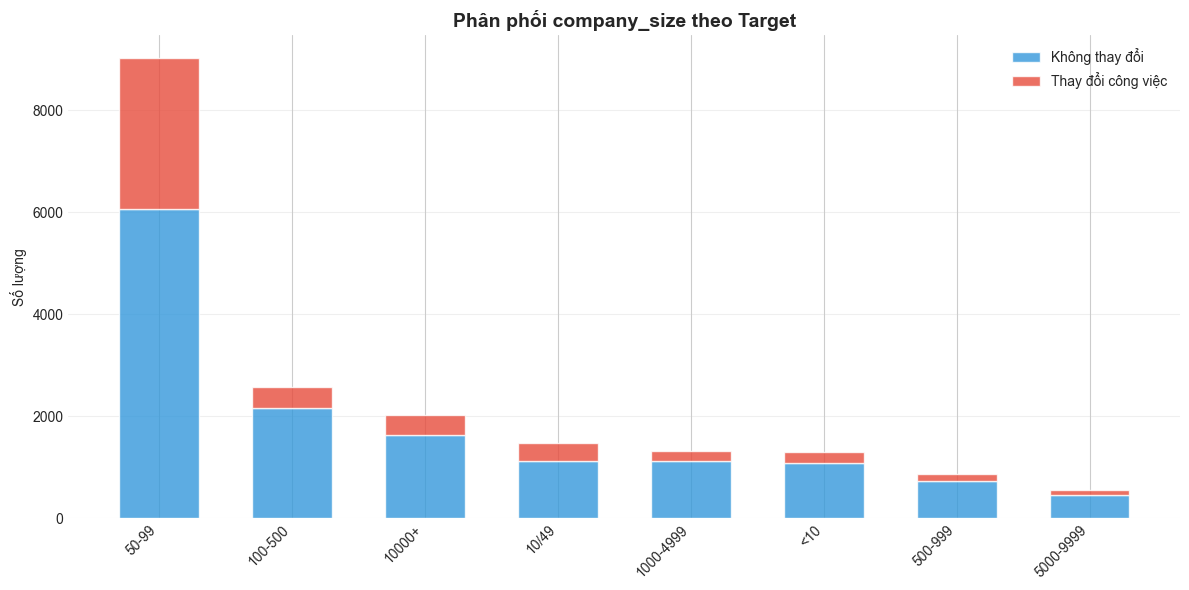


=== COMPANY_TYPE ===
Unique values: 6
Top 5 values:
  Pvt Ltd: 15957
  Funded Startup: 1001
  Public Sector: 955
  Early Stage Startup: 603
  NGO: 521


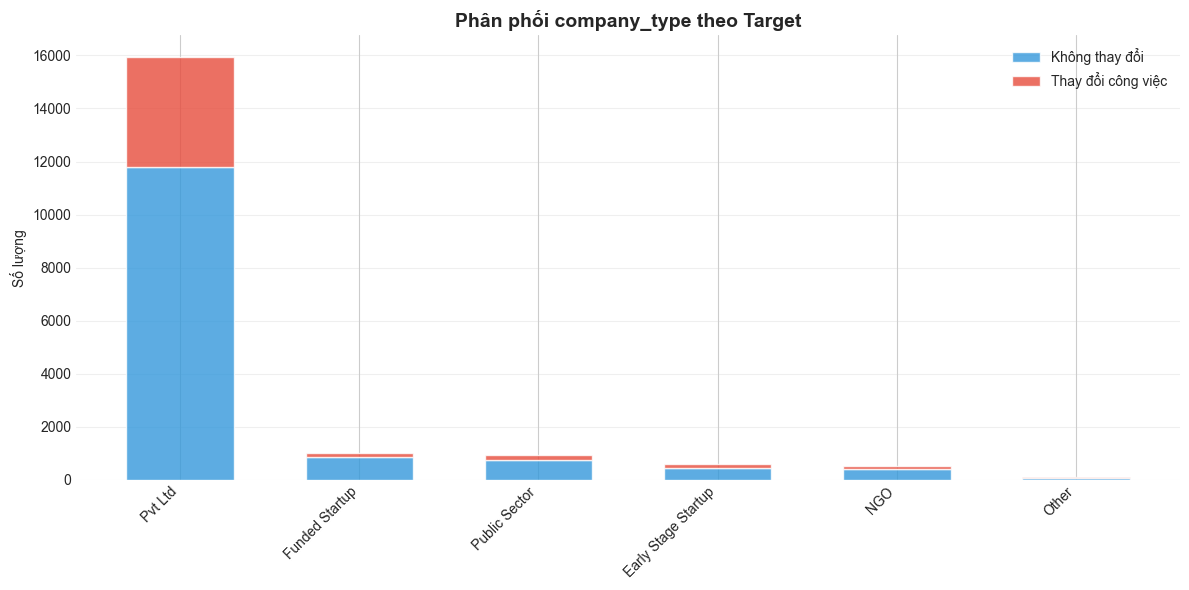


=== LAST_NEW_JOB ===
Unique values: 6
Top 5 values:
  1: 8463
  >4: 3290
  2: 2900
  never: 2452
  4: 1029


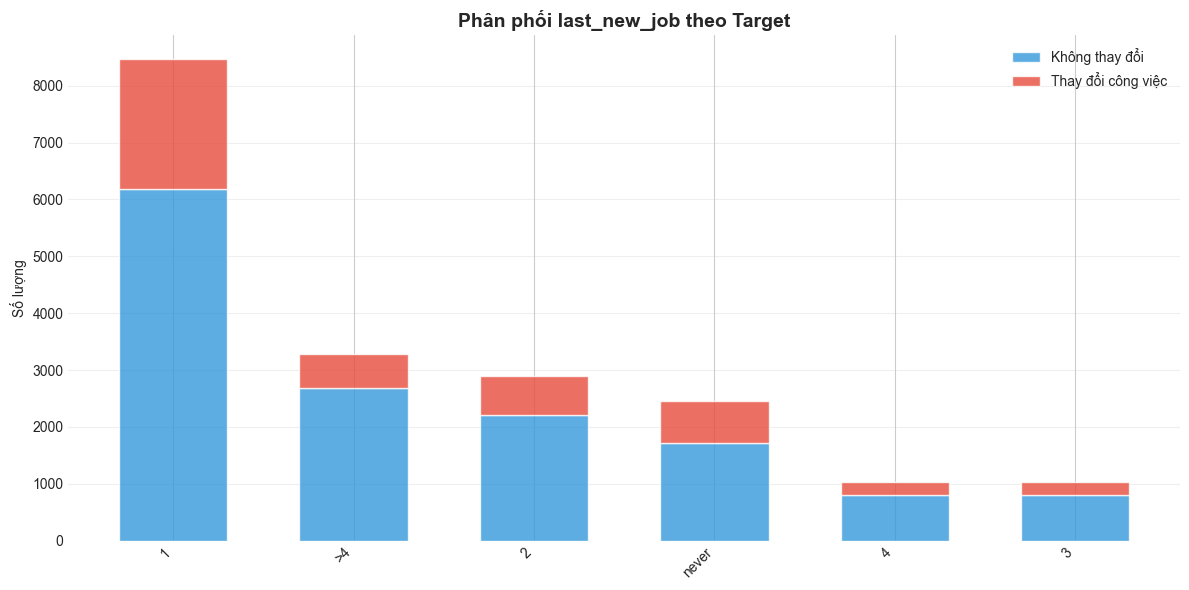

In [7]:
# Cell 7: Categorical features analysis
categorical_features = ['gender', 'relevant_experience', 'enrolled_university',
                        'education_level', 'major_discipline', 'experience',
                        'company_size', 'company_type', 'last_new_job']

for feat in categorical_features:
    if feat in headers:
        col = processor.get_column_by_name(data, headers, feat)
        col_filled = processor.fill_missing_categorical(col, strategy='mode')
        
        print(f"\n=== {feat.upper()} ===")
        unique, counts = np.unique(col_filled, return_counts=True)
        print(f"Unique values: {len(unique)}")
        print(f"Top 5 values:")
        sorted_idx = np.argsort(counts)[::-1][:5]
        for idx in sorted_idx:
            print(f"  {unique[idx]}: {counts[idx]}")
        
        # Visualize
        fig = visualizer.plot_categorical_distribution(
            col_filled, feat, target=target, top_n=10
        )
        plt.show()


=== CORRELATION ANALYSIS ===



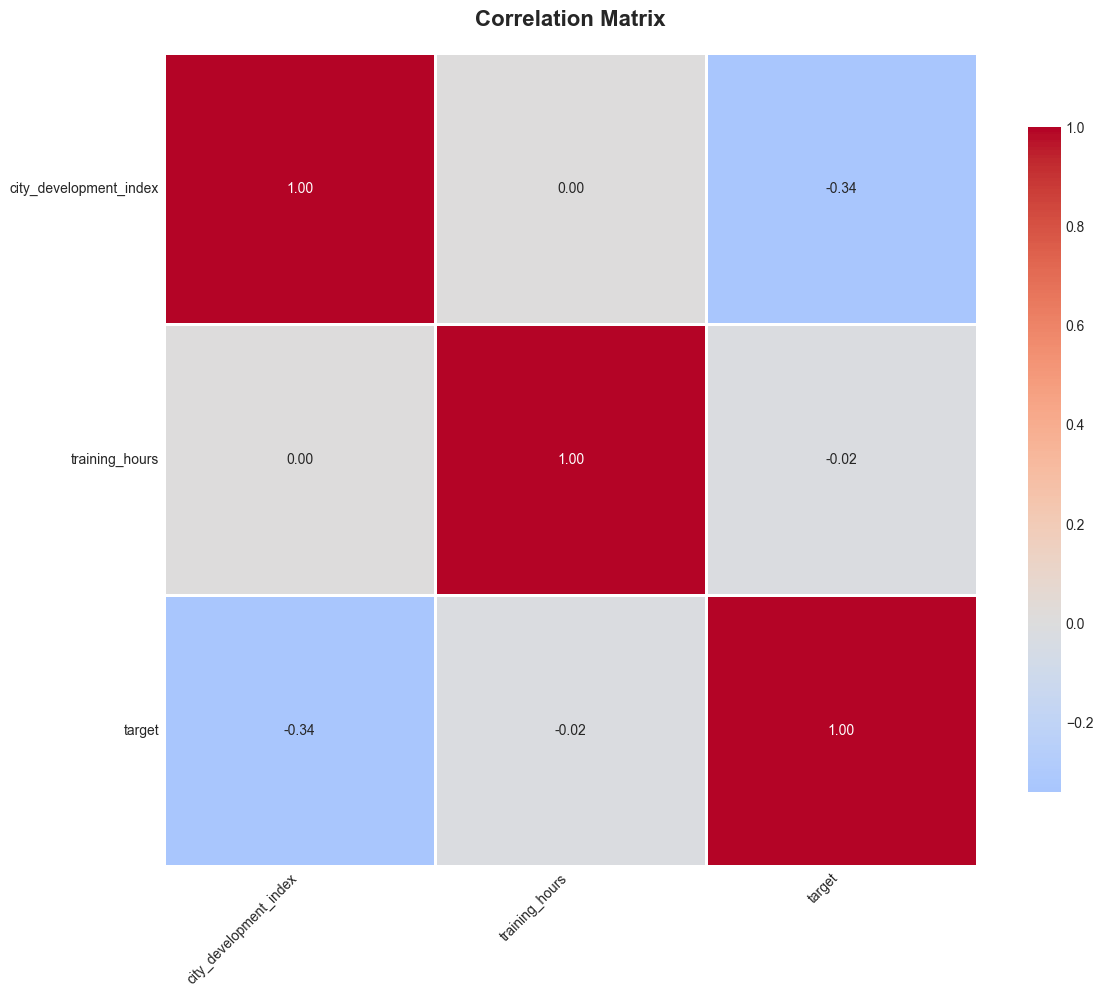

Strong correlations with target:
  city_development_index: -0.3417


In [8]:
# Cell 8: Correlation analysis
print("\n=== CORRELATION ANALYSIS ===\n")

# Prepare numerical data
X_numerical = []
feature_names_num = []

for feat in numerical_features:
    col = processor.get_column_by_name(data, headers, feat)
    col_numeric = processor.fill_missing_numerical(col, strategy='median')
    X_numerical.append(col_numeric)
    feature_names_num.append(feat)

# Add target
X_numerical.append(target)
feature_names_num.append('target')

X_matrix = np.column_stack(X_numerical)
corr_matrix = processor.compute_correlation_matrix(X_matrix)

# Visualize
fig = visualizer.plot_correlation_heatmap(corr_matrix, feature_names_num)
plt.show()

# Print strong correlations
print("Strong correlations with target:")
target_idx = feature_names_num.index('target')
for i, feat in enumerate(feature_names_num):
    if i != target_idx:
        corr = corr_matrix[i, target_idx]
        if abs(corr) > 0.1:
            print(f"  {feat}: {corr:.4f}")

In [9]:
# Cell 9: Research Questions

"""
## Câu hỏi nghiên cứu

### 1. Yếu tố nào ảnh hưởng mạnh nhất đến quyết định thay đổi công việc?
"""

# Phân tích và trả lời câu hỏi 1
print("Analyzing feature importance...")

"""
### 2. Có sự khác biệt về tỷ lệ thay đổi công việc giữa nam và nữ?
"""

gender_col = processor.get_column_by_name(data, headers, 'gender')
gender_filled = processor.fill_missing_categorical(gender_col, strategy='mode')

for g in np.unique(gender_filled):
    mask = gender_filled == g
    target_subset = target[mask]
    change_rate = np.mean(target_subset) * 100
    print(f"{g}: {change_rate:.2f}% muốn thay đổi công việc")

"""
### 3. Kinh nghiệm có ảnh hưởng như thế nào?
"""

exp_col = processor.get_column_by_name(data, headers, 'relevent_experience')
exp_filled = processor.fill_missing_categorical(exp_col, strategy='mode')

for exp in np.unique(exp_filled):
    mask = exp_filled == exp
    target_subset = target[mask]
    change_rate = np.mean(target_subset) * 100
    print(f"{exp}: {change_rate:.2f}% muốn thay đổi công việc")

"""
### 4. Ảnh hưởng của city development index?
"""

cdi = processor.get_column_by_name(data, headers, 'city_development_index')
cdi_numeric = processor.fill_missing_numerical(cdi, strategy='median')

# Chia thành bins
bins = [0, 0.7, 0.85, 1.0]
labels = ['Low', 'Medium', 'High']

for i in range(len(bins)-1):
    mask = (cdi_numeric >= bins[i]) & (cdi_numeric < bins[i+1])
    target_subset = target[mask]
    change_rate = np.mean(target_subset) * 100
    print(f"CDI {labels[i]}: {change_rate:.2f}% muốn thay đổi công việc")


Analyzing feature importance...
Female: 26.33% muốn thay đổi công việc
Male: 24.82% muốn thay đổi công việc
Other: 26.18% muốn thay đổi công việc


Has relevent experience: 21.47% muốn thay đổi công việc
No relevent experience: 33.84% muốn thay đổi công việc
CDI Low: 51.01% muốn thay đổi công việc
CDI Medium: 20.73% muốn thay đổi công việc
CDI High: 16.03% muốn thay đổi công việc


## Key Insights

1. **Imbalanced Dataset**: Dataset có sự mất cân bằng nghiêm trọng với 75% không 
   thay đổi và 25% thay đổi công việc.

2. **Missing Values**: Nhiều features có missing values cao (~30%), đặc biệt là 
   gender, major_discipline, company_size, company_type.

3. **City Development Index**: Có correlation âm mạnh với target (-0.34). Ứng viên 
   ở các thành phố kém phát triển có xu hướng tìm việc mới cao hơn.

4. **Relevant Experience**: Người có kinh nghiệm liên quan có xu hướng ổn định 
   hơn (75% không thay đổi).

5. **Training Hours**: Không có mối quan hệ mạnh với quyết định thay đổi công việc.

## Recommendations

1. Focus on retaining employees from less developed cities
2. Target recruitment efforts based on experience level
3. Customize training programs for different candidate profiles